## Kaggle Google Landmark - Image pre Processing 
A Python note Book which samples a set of the images from the Kaggle Google Landmark 
Based on classes threshold 
Create subdirectories and copy the sample files to these directories 
It allocates, train, test and validation sets 

## Load Libraries 
Loading the required libraries 
The implementation is based on the Keras/TenserFlow Python libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import os
import zipfile
import random
import tarfile
import urllib
import urllib.request
import hashlib
import random
import requests
import random
import shutil
import re 
from shutil import copyfile
import urllib
import glob




## General Settings 

In [2]:
#Column/Row length when printing DataFrames 
pd.set_option('display.max_colwidth', -1)

#Root Directory 
Root_Directory = "E:Elements/kaggle/GoogleLandmarkRecognition2019/"
Meta_Data_Directory = "E:/Elements/kaggle/GoogleLandmarkRecognition2019/Meta/"

## Read Data 
Download the labels and metadata

In [3]:
#Read the train.csv from Google drive - This file has all images names and labels of the landmark (Landmark ID)
DF_Labels = pd.read_csv(Meta_Data_Directory+"train.csv")


In [4]:
print(DF_Labels.shape)
DF_Labels.head()

(4132914, 3)


,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons/b/b5/Observatoriet_v%C3%A4derkammer_2013a.jpg,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/6/63/Ecosse200996-1.jpg,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/2/2c/Pirmasens_Dynamikum.jpg,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons/0/02/Occidental_Vertical.jpg,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons/5/51/Looking_downstream_from_the_footbridge_over_the_Severn_-_geograph.org.uk_-_532337.jpg,2474


## Analyze labels 

Total number of diffrent types of Landmarks: 203094
Total number of files 4132914


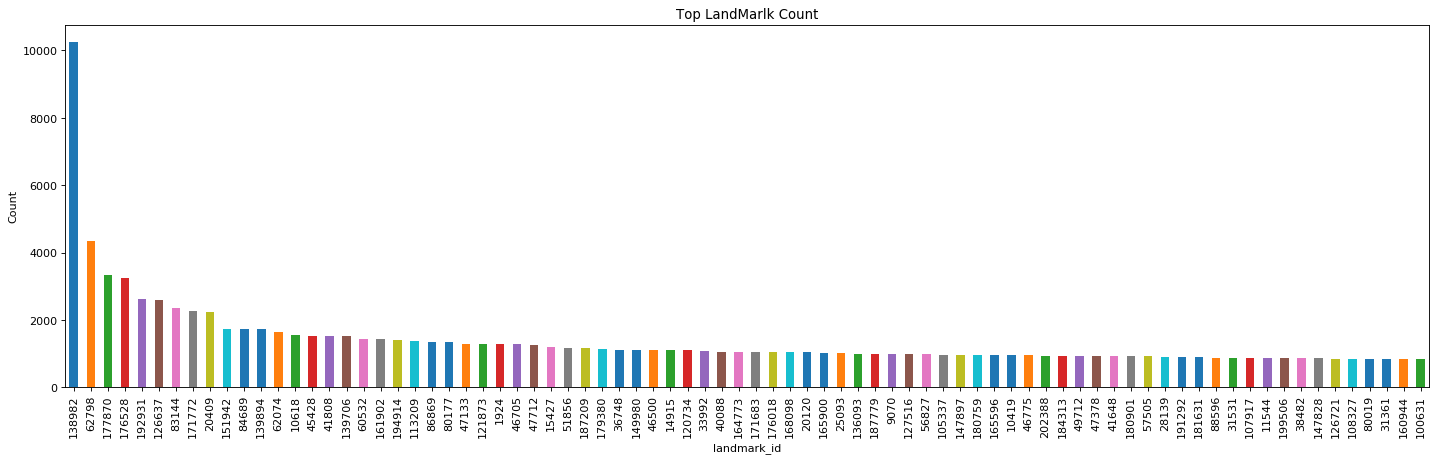

In [5]:
from matplotlib.pyplot import figure
x = (DF_Labels.groupby(['landmark_id']).size()).sort_values(ascending=False)

print("Total number of diffrent types of Landmarks:",len(x))
print("Total number of files",sum(x))
figure(num=None, figsize=(22, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Top LandMarlk Count')
plt.ylabel('Count')
plt.xlabel('LandMark ID')
x.head(80).plot.bar()

In [6]:
random.seed(1234)
landmark_list = [str(x) for x in list(range(1000,3000))]
data_sample = DF_Labels[DF_Labels['landmark_id'].isin(landmark_list)]

There are: 4132914 Images in the Entire set
There are: 42036 Images in the Sample set


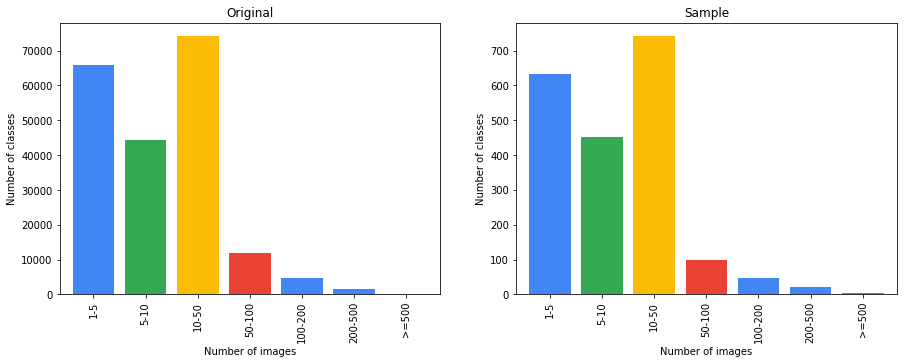

In [7]:
colors = np.array(['#4285f4','#34a853','#fbbc05','#ea4335'])
#Define the order in which to display the graph
order = ['1-5','5-10','10-50','50-100','100-200','200-500', '>=500']
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))



def plot_distribution(data_f, data_k, axis):
    # data['landmark_id'].value_counts()
    x=data_f.landmark_id.value_counts().index
    y=pd.DataFrame(data_f.landmark_id.value_counts())

    #Create a variable to group the number of image sin each class
    y['Number of images'] = np.where(y['landmark_id']>=500,'>=500',y['landmark_id'])
    y['Number of images'] = np.where((y['landmark_id']>=200) & (y['landmark_id']<500),'200-500',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=100) & (y['landmark_id']<200),'100-200',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=50) & (y['landmark_id']<100),'50-100',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=10) & (y['landmark_id']<50),'10-50',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=5) & (y['landmark_id']<10),'5-10',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=0) & (y['landmark_id']<5),'1-5',y['Number of images'])

    y['Number of images'].value_counts().loc[order].plot(kind = 'bar',color = colors,width = 0.8, ax=axis)
    axis.set_xlabel('Number of images')
    axis.set_ylabel('Number of classes')
    axis.set_title(data_k)
    

print("There are:",DF_Labels.shape[0], "Images in the Entire set")
print("There are:",data_sample.shape[0], "Images in the Sample set")
plot_distribution(DF_Labels, 'Original', ax1)
plot_distribution(data_sample, 'Sample', ax2)


## Test data
Download test data

In [13]:
from zipfile import ZipFile

#Extract the test.csv file from the Zip file 
zf = zipfile.ZipFile(Meta_Data_Directory+'test.csv.zip', mode='r')
zf.extractall()
zf.close()
DF_Test_Labels = pd.read_csv("test.csv")
print("There are :",DF_Test_Labels.shape[0],"Test images")




FileNotFoundError: [Errno 2] No such file or directory: 'E:/Elements/kaggle/GoogleLandmarkRecognition2019/Meta/test.csv.zip'

## Fetch Images 

In [39]:
#The Assumption that all Resized files are arrange in 500 directories 
# Directories name are in the Root directory 
# Each direcotry is namex X.resized (X = 0-500)

#Data Directory location of all resized images
Data_Directory = Root_Directory+"Data/"
Base_Name = "X.resized"
Start_Dir = 0
End_Dir = 1



data_sample_resize =[]
data_sample_resize = pd.DataFrame(data_sample_resize)
#itrate over all the resized directories 
for i in  range(Start_Dir,End_Dir):
    Dir_Name = re.sub('X', str(i), Base_Name)
    print(Dir_Name)
  
  #Build the full path with the resized directory name 
    path = Data_Directory+Dir_Name
    img_files =[]
  
  #Look for jpg files 
    try :
        img_files = [f for f in os.listdir(path) if f.endswith('.jpg')  ]
    except WindowsError:
        # can't copy file access times on Windows
        pass
    
  
  #Add the full path the image list 
    img_files_full_path = pd.Series(img_files).apply(lambda x: path+"/"+x)

  
  #print(img_files_full_path)
  
  #Create of ID list (file names without the extension)
    img_id = pd.Series(img_files).apply(lambda x: re.sub('.jpg', '',x))
  #print(img_id)
  
  #Create a data frame
    df = pd.concat([img_id, img_files_full_path], axis=1)
    df = df.rename(columns={0: 'id', 1: 'File_Path'})
  
  #Join the Sample data and this folder data based on image id's
  #print(df.head())
  
  #Merge the Sample Data datframe and the files Data frame 
    df = pd.merge(df, data_sample, left_on='id', right_on='id', how='inner')
    print("Found ",df.shape[0],"Sample files in this directory")
  #Append to previous ....
    data_sample_resize = pd.concat([data_sample_resize,df], axis=0,ignore_index=True,sort=False)
  
#Remove the url column
data_sample_resize.drop('url', axis=1, inplace=True)
print(data_sample_resize.shape)



data_sample_resize.head()


 
  

0.resized
Found  90 Sample files in this directory
(90, 3)


,id,File_Path,landmark_id
0,0001b7ba0106b4d6,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/0.resized/0001b7ba0106b4d6.jpg,1032
1,0001f97159a3e4f4,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/0.resized/0001f97159a3e4f4.jpg,2202
2,000428e0ff87eecb,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/0.resized/000428e0ff87eecb.jpg,1236
3,00061e23ce736fa9,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/0.resized/00061e23ce736fa9.jpg,1924
4,000757ced838b008,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/0.resized/000757ced838b008.jpg,1966


## Split Data (Train,Test ,Validiation)

In [35]:


'''Split to test and train'''
percent_test = 0.01 #takes 1% from each class as holdout data

data_test = pd.DataFrame(columns = ['id','File_Path','landmark_id'])
data_training_all = pd.DataFrame(columns = ['id','File_Path','landmark_id'])
random.seed(42)
for landmark_id in set(data_sample_resize['landmark_id']):
    n=1
    t = data_sample_resize[(data_sample_resize.landmark_id == landmark_id)] #get all images for a landmark id
    i = 0
    r =[]
    while i < len(t.id):
        it = i
        r.append(t.id.iloc[it])  #create a list of all these images
        i += 1
        
    test = random.sample(r,int(percent_test*len(r))) #randomly pick a sample of 1% images from list 'r'
    training = list(set(r) - set(test))  #get the remaining images
    data_t = data_sample_resize[data_sample_resize.id.isin(test)] #holdout dataset
    data_tr = data_sample_resize[data_sample_resize.id.isin(training)] #training dataset
    data_test = data_test.append(data_t)  
    data_training_all = data_training_all.append(data_tr)
    n+=1

print ('1. train and test set created')


'''Split into train and validation set'''
percent_validation = 0.2 #takes 20% from each class as holdout data

data_valid = pd.DataFrame(columns = ['id','File_Path','landmark_id'])
data_train = pd.DataFrame(columns = ['id','File_Path','landmark_id'])
random.seed(42)
for landmark_id in set(data_training_all['landmark_id']):
    n=1
    t = data_training_all[(data_training_all.landmark_id == landmark_id)]
    i = 0
    r =[]
    while i < len(t.id):
        it = i
        r.append(t.id.iloc[it])
        i += 1
        
    valid = random.sample(r,int(percent_validation*len(r)))
    train = list(set(r) - set(valid)) 
    data_v = data_training_all[data_training_all.id.isin(valid)]
    data_t = data_training_all[data_training_all.id.isin(train)]
    data_valid = data_valid.append(data_v)
    data_train = data_train.append(data_t)
    n+=1

print ('2. train and validation set created')

1. train and test set created
2. train and validation set created


In [36]:
print (len(data_train))
print (len(data_valid))
print (len(data_test))


34001
7511
113


## Pre process the images 

In [37]:
##create folders for landmark IDs in Training folder


train_data = data_train.copy(deep=True)

temp = pd.DataFrame(data_train.landmark_id.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']


def createfolders(dataset,folder):
    i = 0
    while i < len(dataset):
        landmark = str(dataset.landmark_id.iloc[i])
        path = 'c:/temp/' + folder + '/'+ landmark
        
        if  (os.path.exists(path) == False):
            os.makedirs(path)
        i+=1
createfolders(temp,'train_images_model')
print ('Train folders created')



rootdirpics = Root_Directory+r'Data/'
rootdirfolders = 'c:/temp/train_images_model/'
train_data['landmark_id'] = train_data['landmark_id'].apply(lambda x: rootdirfolders+str(x))

def cpy(x):
    try :
        shutil.copy2(x['File_Path'],x['landmark_id'])
    except WindowsError:
        # can't copy file access times on Windows
        pass

def transformdata(data,path2):

       
    #data.apply(lambda x: shutil.copy2(x['File_Path'],x['landmark_id']),axis=1)
    
    data.apply(lambda x:cpy(x),axis=1)
               

transformdata(train_data,rootdirfolders)
print ('Train images moved')


Train folders created
Train images moved


In [31]:

#train_data[train_data['File_Path'].str.contains("c140564dc13c443b")]
data_valid.head()

,id,File_Path,landmark_id
712,04b884ff790036fd,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/9.resized/04b884ff790036fd.jpg,1000
3413,15225c746609b5e3,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/41.resized/15225c746609b5e3.jpg,1000
9483,39984d084ebe7b98,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/112.resized/39984d084ebe7b98.jpg,1000
38374,eb9b5973c5040247,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/460.resized/eb9b5973c5040247.jpg,1000
25985,9f16f44d2e92b92b,E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/310.resized/9f16f44d2e92b92b.jpg,1002


In [38]:
##create folders for landmark IDs in Validation folder
valid_data = data_valid.copy(deep=True)

temp = pd.DataFrame(data_valid.landmark_id.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
createfolders(temp,'validation_images_model')
print ('Validation folders created')

#make folders for landmark ID which had no images in validation sets - required for codes running next
#available = [int((x[0].split('/'))[-1]) for x in os.walk(r'c:/tempvalidation_images_model/') if len((x[0].split('/'))[-1]) > 0]
#new = [str(x) for x in range(1000,2999) if x not in available]
#for i in new:
#    path = Root_Directory + '/validation_images_model/' + i
#    if not os.path.exists(path):
#        os.makedirs(path)


rootdirpics = Root_Directory+r'Data/'
print(rootdirpics)
rootdirfolders = "c:/temp/"+ r'validation_images_model/'   
print(rootdirfolders)
valid_data['landmark_id'] = valid_data['landmark_id'].apply(lambda x: rootdirfolders+str(x))
transformdata(valid_data,rootdirfolders)
print ('Validation images moved')

Validation folders created
E:Elements/kaggle/GoogleLandmarkRecognition2019/Data/
c:/temp/validation_images_model/
Validation images moved


## Diplay images 

In [0]:
from IPython.display import Image
from IPython.core.display import HTML 

def displayLandmarkImagesLarge(urls, category_name):
    img_style = "width: 200px; height:160px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(16).iteritems()])
    display(HTML(images_list))

category = DF_Labels['landmark_id'].value_counts().keys()[999]
urls = DF_Labels[DF_Labels['landmark_id'] == category]['url']
displayLandmarkImagesLarge(urls, "")